In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import cv2
import os.path
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataTrain = Path("../content/gdrive/My Drive/Colab Notebooks/dataset/training_set")
filepath = list(dataTrain.glob(r"**/*.jpg"))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

In [ ]:
filepath = pd.Series(filepath, name='Filepath').astype(str)
labels = pd.Series(labels,name="Labels")

In [ ]:
ListA = []
for i in filepath:
    image = cv2.imread(i,0)
    ListA.append(np.array(image,"uint8"))

In [ ]:
ListA = pd.Series(ListA,name="Array")
MainData = pd.concat([ListA,labels],axis=1)
data = MainData.copy()
print(data["Labels"].value_counts())

Openness             50
Agreeableness        24
Neuroticism          24
Conscientiousness    22
Extraversion          6
Name: Labels, dtype: int64


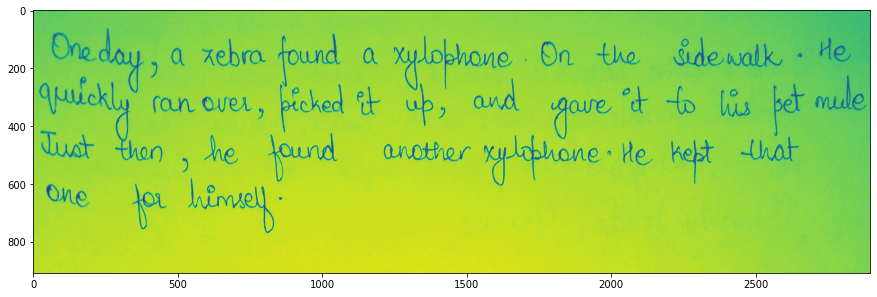

In [ ]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][10])

In [ ]:
print(data.head())

                                               Array    Labels
0  [[180, 178, 177, 178, 176, 174, 177, 179, 178,...  Openness
1  [[179, 180, 180, 178, 177, 179, 181, 181, 182,...  Openness
2  [[129, 128, 129, 124, 123, 124, 128, 130, 134,...  Openness
3  [[144, 144, 147, 152, 145, 150, 150, 150, 146,...  Openness
4  [[179, 178, 177, 177, 178, 178, 179, 180, 179,...  Openness


In [ ]:
data['Array'].iloc[0].shape

(1401, 2896)

In [ ]:
SecondData = pd.concat([filepath,labels],axis=1)
x = SecondData["Filepath"]
y = SecondData["Labels"]
encode = LabelEncoder()
x = encode.fit_transform(x)
y = encode.fit_transform(y)
SecondData = pd.concat([filepath,labels],axis=1)

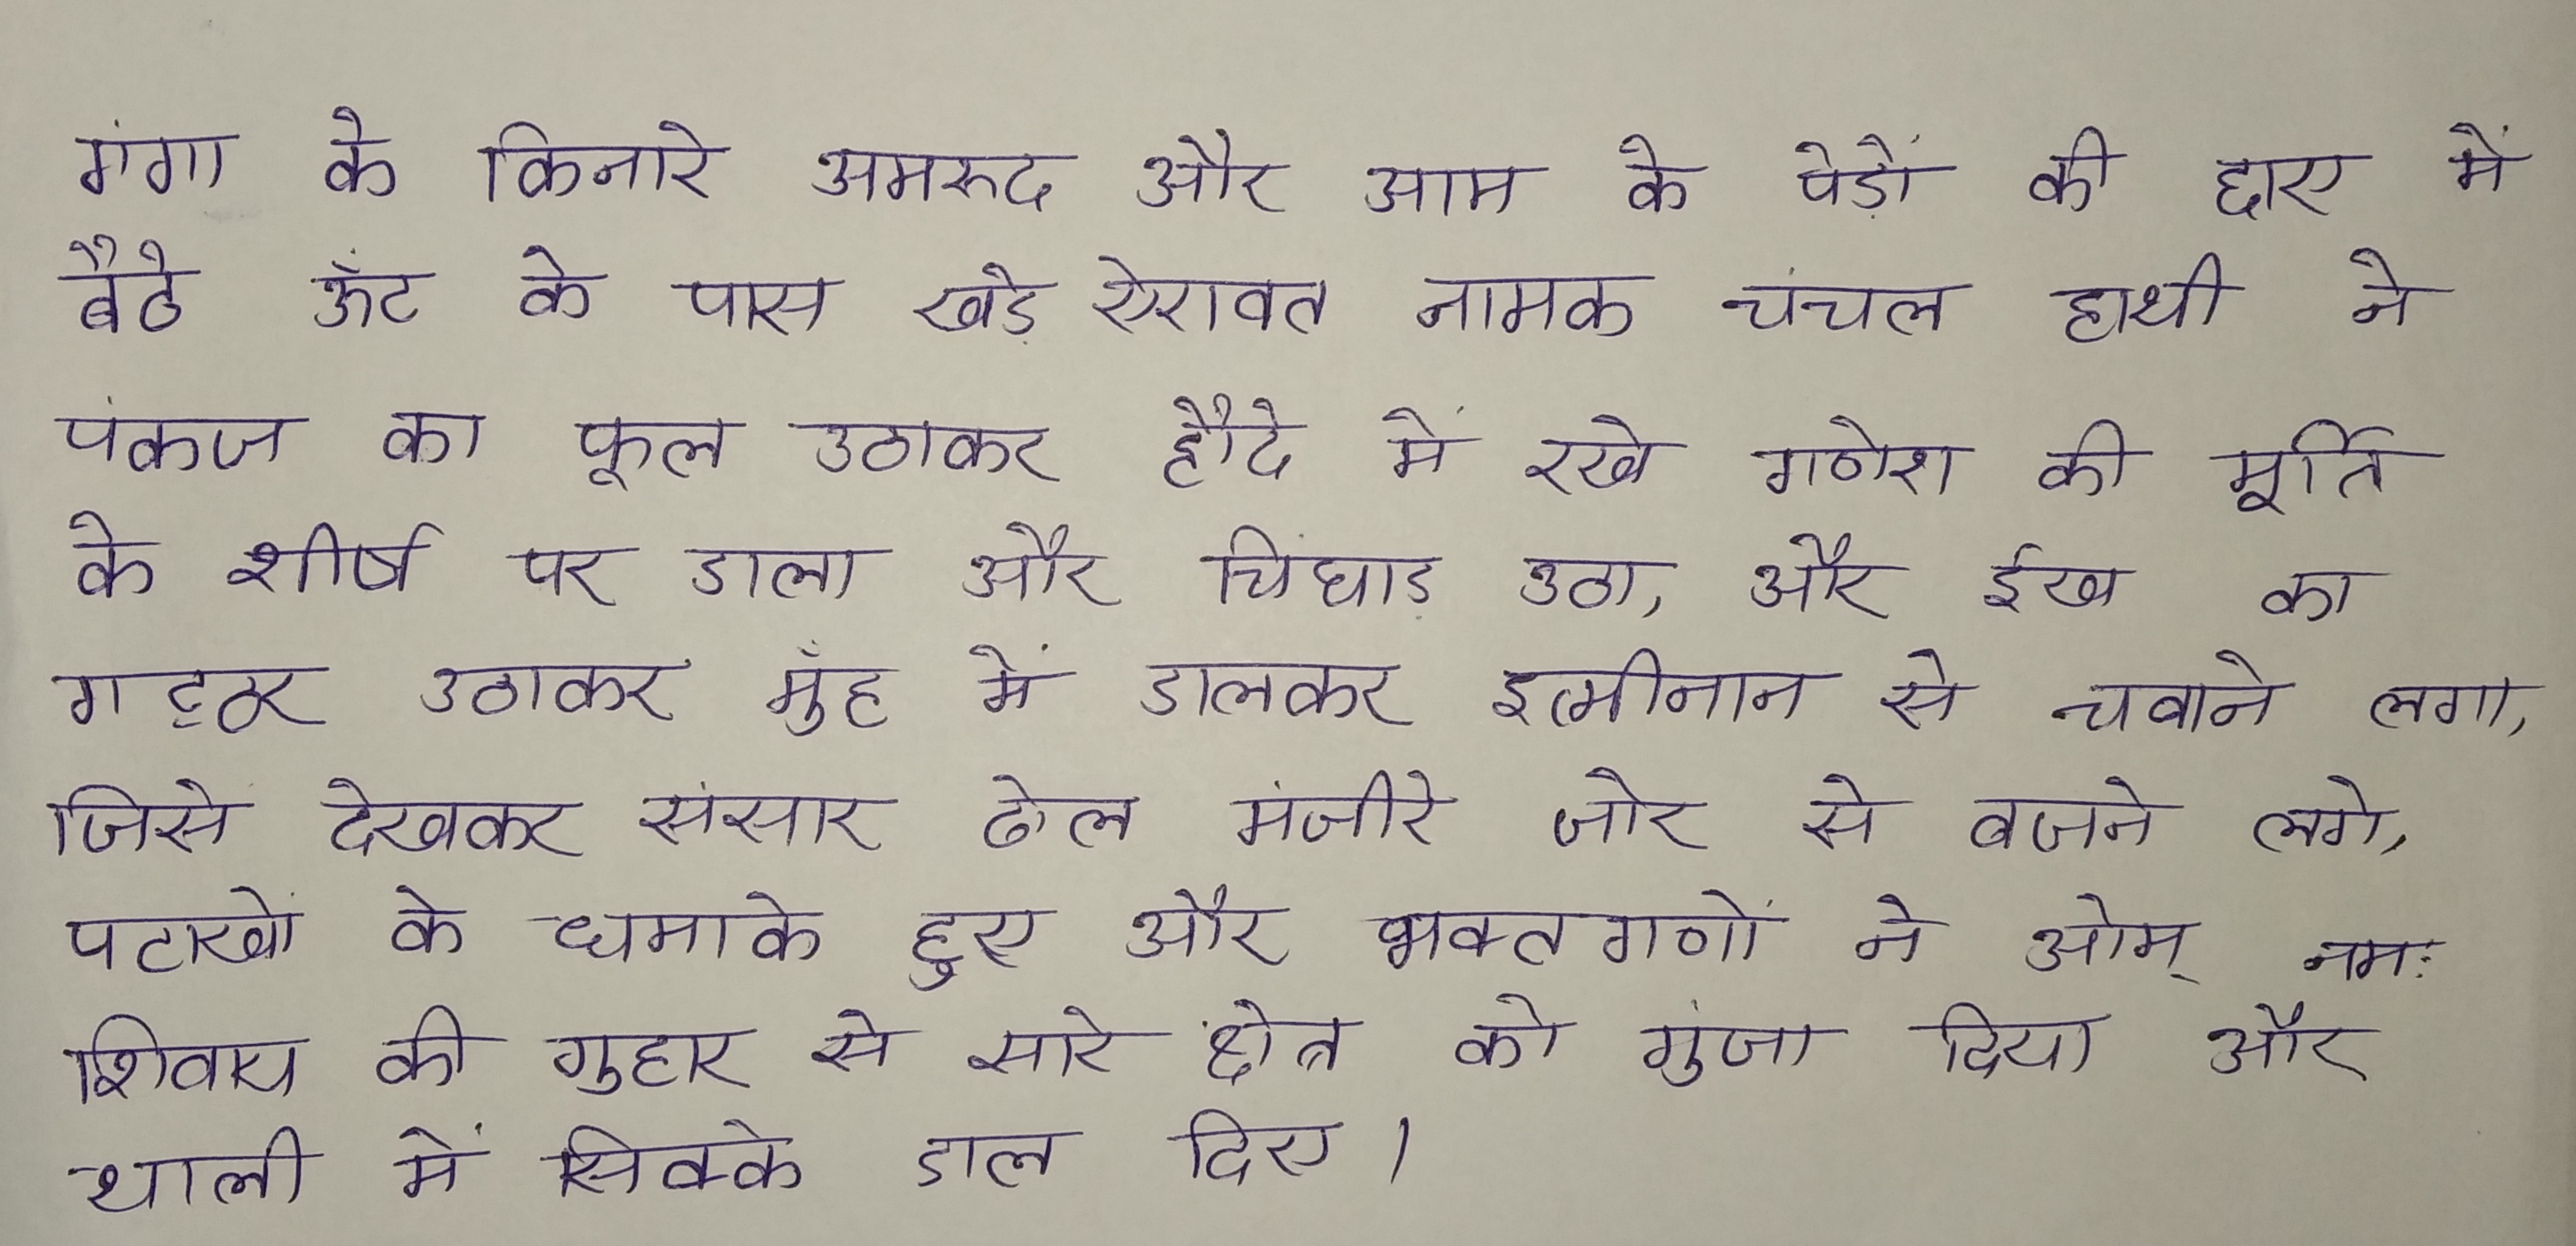

In [ ]:
from google.colab.patches import cv2_imshow
path = SecondData.iloc[0][0]
image = cv2.imread(path)
cv2_imshow(image)

In [ ]:
x = SecondData["Filepath"]
y = SecondData["Labels"]
encode = LabelEncoder()
x = encode.fit_transform(x)
y = encode.fit_transform(y)


In [ ]:
x

array([ 76,  96,  89, 101,  84,  78,  91,  86,  99,  95,  83,  79, 100,
        88,  93,  97,  92,  80,  81,  98,  82,  85,  94,  90,  77,  87,
       106, 121, 123, 125, 103, 105, 114, 120, 110, 109, 107, 118, 117,
       113, 111, 112, 104, 116, 102, 108, 122, 124, 115, 119,  46,  47,
        48,  50,  49,  51,  10,   5,   2,  23,  18,  21,  13,   3,  15,
        14,   1,   6,  12,   0,   7,   8,  19,  11,  20,  22,  17,   9,
         4,  16,  25,  24,  32,  31,  42,  28,  26,  39,  30,  27,  37,
        33,  45,  34,  41,  44,  40,  36,  43,  35,  29,  38,  52,  64,
        74,  59,  58,  71,  62,  73,  72,  56,  68,  60,  65,  75,  57,
        67,  63,  53,  66,  54,  55,  61,  70,  69])

In [ ]:
y

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
x = np.asarray(x).astype("float32")
x = x.reshape(126,1,1)

y = np.asarray(y).astype("float32")
y = y.reshape(126,1,1)

In [ ]:
# xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,random_state=42)
# xTrain

CNN Implementation

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers.core import Dropout
from keras.metrics import categorical_crossentropy
from keras.callbacks import ModelCheckpoint

In [ ]:
dataTrain = Path("../content/gdrive/My Drive/Colab Notebooks/dataset/training_set")
dataValidation = Path("../content/gdrive/My Drive/Colab Notebooks/dataset/validation_set")
# dataTest = Path("../content/gdrive/My Drive/Colab Notebooks/dataset/test_set")
filepath = list(dataTrain.glob(r"**/*.jpg"))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

selectedClasses = os.listdir(dataTrain)

In [ ]:
len(selectedClasses)

4

In [ ]:
train_datagen = ImageDataGenerator(#featurewise_center = True,
                              rescale = 1./255,
                              rotation_range = 20,
                              fill_mode = 'nearest',
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True,)
                                        
train_generator = train_datagen.flow_from_directory(
        dataTrain,
        target_size=(224, 224), 
        batch_size= 16,
        #classes = selectedClasses,
        shuffle=True,
        class_mode='categorical')

Found 148 images belonging to 4 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
        dataValidation,
        target_size=(224, 224), 
        batch_size= 16,
        #classes = selectedClasses,
        shuffle=True,
        class_mode='categorical')

validation_steps= val_generator.samples//64
print(validation_steps)

Found 21 images belonging to 4 classes.
0


In [ ]:
base_model = InceptionResNetV2(weights='imagenet',
                         include_top=False,
                        input_shape = (224,224,3))
base_model.trainable = False
x = base_model.output
x = keras.layers.GlobalMaxPooling2D()(x)
x = BatchNormalization()(x)
x = Dense(50,activation='relu')(x)
predictions = Dense(len(selectedClasses), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
# model.summary()

model.compile(optimizer = Adam(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
model_checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

train_generator.reset()
val_generator.reset()

historyTM = model.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch = 9,
                    validation_steps = 1,
                    epochs = 30, 
                    verbose = 1
                    callbacks = [model_checkpoint]
                   ) 



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
9/9 [==============================] - 27s 2s/step - loss: 1.6603 - accuracy: 0.4167 - val_loss: 2.3731 - val_accuracy: 0.3750
Epoch 2/30
9/9 [==============================] - 10s 1s/step - loss: 1.1957 - accuracy: 0.5455 - val_loss: 2.8073 - val_accuracy: 0.1875
Epoch 3/30
9/9 [==============================] - 10s 1s/step - loss: 1.1202 - accuracy: 0.5758 - val_loss: 3.0144 - val_accuracy: 0.3125
Epoch 4/30
9/9 [==============================] - 10s 1s/step - loss: 0.9939 - accuracy: 0.6212 - val_loss: 2.6685 - val_accuracy: 0.2500
Epoch 5/30
9/9 [==============================] - 9s 1s/step - loss: 0.9716 - accuracy: 0.6212 - val_loss: 2.3728 - val_accuracy: 0.3125
Epoch 6/30
9/9 [==============================] - 10s 1s/step - loss: 0.9196 - accuracy: 0.5909 - val_loss: 2.0658 - val_accuracy: 0.3125
Epoch 7/30
9/9 [==============================] - 10s 1s/step - loss: 0.9064 - accuracy: 0.6061 - val_loss: 1.8072 - val_accuracy: 0.4375
Epoch 8/30
9/9 [===================

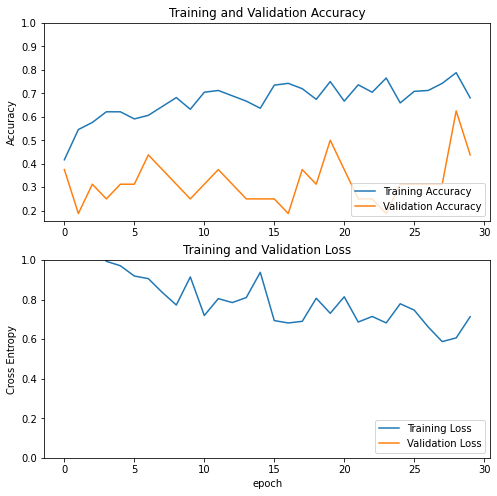

In [ ]:
# Plot the learning curves
acc = historyTM.history['accuracy']
val_acc = historyTM.history['val_accuracy']

loss = historyTM.history['loss']
val_loss = historyTM.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# # test_generator = train_datagen.flow_from_directory(
# #         dataTest,
# #         target_size=(224, 224), 
# #         batch_size= 16,
# #         #classes = selectedClasses,
# #         shuffle=True,
# #         class_mode='categorical')
# filepath = list(dataTest.glob(r"**/*.jpg"))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))
# for i in filepath:
#   print(i)
#   #predictions = np.argmax( model.predict(i),axis=1)
#   model.predict(i)


In [ ]:
# base_model.trainable = True
# layers_to_freeze = 50
# for i in base_model.layers[:layers_to_freeze]:
#     i.trainable = False


# model.compile(optimizer = Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
# train_datagen.fit(train_generator)
# fine_tunemodel = model.fit(train_generator,
#                           epochs = 30,
#                           initial_epoch = historyTM.epoch[-1],
#                           validation_data = val_generator,
#                           verbose = 1,
#                           steps_per_epoch = 9,
#                           validation_steps = 1)

# model.evaluate(val_generator)

In [ ]:
base_model.trainable = True
layers_to_freeze = 50
for i in base_model.layers[:layers_to_freeze]:
    i.trainable = False
    
model.compile(optimizer = Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
fine_tunemodel = model.fit(train_generator,
                          epochs = 50,
                          initial_epoch = 0,
                          validation_data = val_generator,
                          verbose = 1,
                          steps_per_epoch = 9,
                          validation_steps = 1)

Epoch 1/50
9/9 [==============================] - 11s 1s/step - loss: 0.7756 - accuracy: 0.6970 - val_loss: 5.3761 - val_accuracy: 0.2500
Epoch 2/50
9/9 [==============================] - 12s 1s/step - loss: 0.9819 - accuracy: 0.6818 - val_loss: 2.5088 - val_accuracy: 0.2500
Epoch 3/50
9/9 [==============================] - 12s 1s/step - loss: 1.1160 - accuracy: 0.6818 - val_loss: 2.3868 - val_accuracy: 0.2500
Epoch 4/50
9/9 [==============================] - 12s 1s/step - loss: 0.8758 - accuracy: 0.6894 - val_loss: 2.9917 - val_accuracy: 0.1875
Epoch 5/50
9/9 [==============================] - 12s 1s/step - loss: 0.8392 - accuracy: 0.6591 - val_loss: 1.9437 - val_accuracy: 0.3750
Epoch 6/50
9/9 [==============================] - 12s 1s/step - loss: 0.8456 - accuracy: 0.7273 - val_loss: 1.9445 - val_accuracy: 0.3750
Epoch 7/50
9/9 [==============================] - 12s 1s/step - loss: 0.8722 - accuracy: 0.6667 - val_loss: 5.7824 - val_accuracy: 0.2500
Epoch 8/50
9/9 [==================